In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.patches as mpatches



Text(0.5, 1.0, "Barcelona's shots (without goals) VS Juventus")

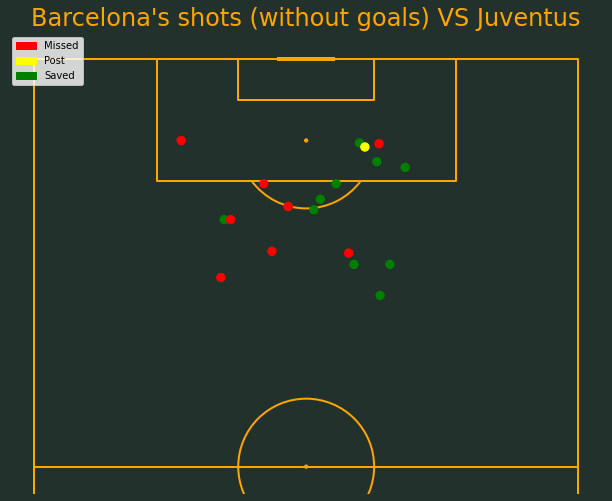

In [2]:
text_color = "orange"

# Importation des données
data = pd.read_csv("C:/Users/lione/Documents/Entrainement _logiciels/Python/shotmaps.csv")

fig = plt.figure(figsize=(13, 8.5))  # parfois, on peut voir : fig, ax = plt.subplots=((figsize=...))
ax = fig.add_subplot(111)
fig.set_facecolor("#22312b")  # couleur de l'arrière plan (tout ce qui est en dehors du graphe)
ax.patch.set_facecolor("#22312b") # couleur de l'arrière plan du graphe

# Création du terrain
pitch = VerticalPitch(half=True, pitch_color="#22312b", line_color="orange")

# arrière plan (hors graphe) + arrière plan graphe + terrain = même couleurpour avoir un bel affichage


# Ici, nous voulons que le terrain prenne la taille du graphe (ax)
pitch.draw(ax=ax)   # nombre de terrains : par exemple, pitch.draw(nrows=2, ncols=3)


# Remarque : ici, on travaille sur le but situé en haut de l'écran : si on veut travailler sur celui du bas,
# faut inverse les coordonnées y en utilisant la commande suivante:
# plt.gca().invert_yaxis()



# Nous voulons associer la couleur à une 3e variable : outcome
# Par exemple : point en jaune si c'est "Post", point en rouge si c'est "Missed" etc.
x = data['outcome'] # x correspond à la colonne outcome

# Function to map the colors as a list from the input list of x variables
def pltcolor(outcome):
    cols = []  # création d'une liste vide
    for i in outcome:
        if i == 'Missed':
            cols.append('red')  # on ajoute à la liste (vide) la couleur rouge
        elif i == 'Post':
            cols.append('yellow')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(x)

# On trace les points en utilisant les coordonnées : pour la valeur de la coordonnée du point en x, on la prend
# dans la colonne 'x' du fichier.csv et colonne 'y' pour l'ordonnée

plt.scatter(data['x'], data['y'], c=cols, s=70)  # s = size points

# Légende
red_patch = mpatches.Patch(color='red', label='Missed')
yellow_patch = mpatches.Patch(color='yellow', label='Post')
green_patch = mpatches.Patch(color='green', label='Saved')
plt.legend(handles=[red_patch, yellow_patch, green_patch], loc="upper left")


# Titre sur figure :
plt.title("Barcelona's shots (without goals) VS Juventus", fontsize=24, c=text_color)